<a href="https://colab.research.google.com/github/fabio-baum/ia_para_engenheiros2/blob/main/Pr%C3%A1tica_Aulas_6_e_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
# importar base de dados
from google.colab import files
uploaded = files.upload()

Saving Database_CdSe.csv to Database_CdSe (1).csv


In [66]:
# Ler o arquivo csv
df = pd.read_csv("Database_CdSe.csv")

In [67]:
# Selecionar colunas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

In [68]:
# Selecionar as colunas para os dados de treinamento
X = df[numeric_cols]
y = df["Diameter_nm"]

In [69]:
# Verificar e remover colunas faltantes
cols_to_remove = []

for col in X.columns:
    if X[col].isnull().any():
        print(f"Coluna {col} contém valores faltantes.")
        cols_to_remove.append(col)

X = X.drop(columns=cols_to_remove)

Coluna Cd/CA_ratio contém valores faltantes.
Coluna Chalcogen/Ph_ratio contém valores faltantes.


In [70]:
# Remover target do X
X = X.drop(columns=["Diameter_nm"])

In [71]:
# Dividir os dados entre conjunto de treinamento e conjunto de validação
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [10]:
# Treinar a regressão linear
model_val_cruz = LinearRegression()
model_val_cruz.fit(X_train, y_train)

LinearRegression()

In [11]:
# Fazer predições no conjunto de validação
y_pred_val_cruz = model_val_cruz.predict(X_val)

In [73]:
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Calcular as métricas de erro de validação
mse_val_cruz = mean_squared_error(y_val, y_pred_val_cruz)
r2_val_cruz = r2_score(y_val, y_pred_val_cruz)

print(f"R2 Score: {r2_val_cruz}")
print(f"MSE: {mse_val_cruz}")

R2 Score: 0.3466226891046864
MSE: 2.731437855739785


In [16]:
# Utilizar o método de k-fold cross validation
n = len(X)
k = n
fold_size = n // k
cv_scores = []

In [19]:
for fold in range(k):
  print(f"Fold: {fold}")
  start = fold * fold_size
  end = start + fold_size if fold < k-1 else n

  test_indices_fold = list(range(start, end))
  train_indices_fold = list(range(0, start)) + list(range(end, n))

  #separar dados
  X_train_fold = X.iloc[train_indices_fold]
  y_train_fold = y.iloc[train_indices_fold]

  X_test_fold = X.iloc[test_indices_fold]
  y_test_fold = y.iloc[test_indices_fold]

  # Treinar o modelo e prever o target
  model_fold = LinearRegression()
  model_fold.fit(X_train_fold, y_train_fold)
  y_pred_fold = model_fold.predict(X_test_fold)

  # Calcular as métricas de erro
  mse_fold = mean_squared_error(y_test_fold, y_pred_fold)
  #r2_fold = r2_score(y_test_fold, y_pred_fold)

  #print(f"R2 Score: {r2_fold}")
  print(f"MSE: {mse_fold}")

  cv_scores.append((r2_fold, mse_fold))

Fold: 0
MSE: 0.8920516703408656
Fold: 1
MSE: 0.5298613793093095
Fold: 2
MSE: 2.985744602326904
Fold: 3
MSE: 2.38572807001344
Fold: 4
MSE: 2.2321159105053328
Fold: 5
MSE: 1.913143653978979
Fold: 6
MSE: 1.4743150834678254
Fold: 7
MSE: 1.2748355063145134
Fold: 8
MSE: 1.1547202403322239
Fold: 9
MSE: 1.0406038813146379
Fold: 10
MSE: 2.499942906611825
Fold: 11
MSE: 2.069536289081517
Fold: 12
MSE: 1.378089620996737
Fold: 13
MSE: 0.9834981652824575
Fold: 14
MSE: 0.6276553216931073
Fold: 15
MSE: 0.4717007957168382
Fold: 16
MSE: 0.48096484414243307
Fold: 17
MSE: 0.4903306595400513
Fold: 18
MSE: 2.442650693634467
Fold: 19
MSE: 1.7033173115225406
Fold: 20
MSE: 1.1210426126797552
Fold: 21
MSE: 0.11715825395051692
Fold: 22
MSE: 0.4095402269863595
Fold: 23
MSE: 1.3190111580258215
Fold: 24
MSE: 1.514692788432723
Fold: 25
MSE: 1.665538525228311
Fold: 26
MSE: 1.235957067177305
Fold: 27
MSE: 0.23275622601287044
Fold: 28
MSE: 0.003972447808994697
Fold: 29
MSE: 0.0632574278455228
Fold: 30
MSE: 2.9557053747

In [20]:
# Bootstrap

n_bootstrap = 500
n_samples = len(X)
r2_score_boot = []
coefficients_boot = []

In [21]:
# Executar bootstrap

for i in range(n_bootstrap):
  print(f"Executando iteração {i+1}")

  #Amostragem
  bootstrap_indices = np.random.choice(range(n_samples), n_samples, replace = True)

  x_boot = X.iloc[bootstrap_indices]
  y_boot = y.iloc[bootstrap_indices]

  # Treinar o modelo
  model_boot = LinearRegression()
  model_boot.fit(x_boot, y_boot)

  #Fazer predições
  y_pred_boot = model_boot.predict(X_val)

  #Calcular as métricas de erro
  mse_boot = mean_squared_error(y_val, y_pred_boot)
  r2_boot = r2_score(y_val, y_pred_boot)

  #Mostrar métricas de erro
  print(f"R2 Score: {r2_boot}")
  print(f"MSE: {mse_boot}")

  r2_score_boot.append(r2_boot)
  coefficients_boot.append(model_boot.coef_)

Executando iteração 1
R2 Score: 0.4303962950144856
MSE: 2.3812230645645305
Executando iteração 2
R2 Score: 0.48775197344497867
MSE: 2.141448176924167
Executando iteração 3
R2 Score: 0.4338503193283588
MSE: 2.36678354759901
Executando iteração 4
R2 Score: 0.4525015393666013
MSE: 2.2888122932890322
Executando iteração 5
R2 Score: 0.47522523366417435
MSE: 2.193816097688671
Executando iteração 6
R2 Score: 0.4145705878463757
MSE: 2.4473822882351453
Executando iteração 7
R2 Score: 0.41357026857895707
MSE: 2.4515641137581485
Executando iteração 8
R2 Score: 0.4209710774980593
MSE: 2.420625099948452
Executando iteração 9
R2 Score: 0.47190861763935643
MSE: 2.2076811805620373
Executando iteração 10
R2 Score: 0.3961182998160667
MSE: 2.5245219091104643
Executando iteração 11
R2 Score: 0.4115867347191704
MSE: 2.459856258866981
Executando iteração 12
R2 Score: 0.49506381471020766
MSE: 2.1108810915755196
Executando iteração 13
R2 Score: 0.43873719963016344
MSE: 2.3463539893173992
Executando iteração 1

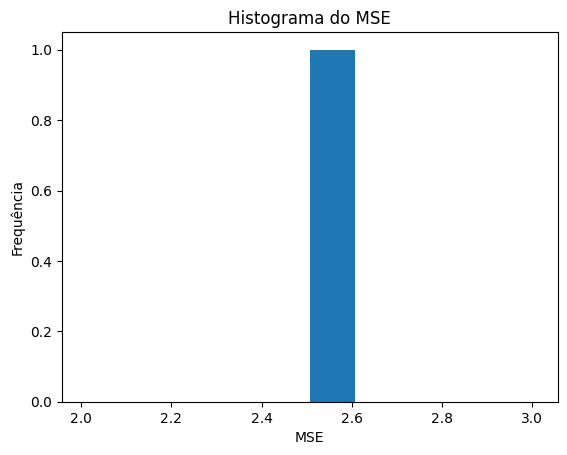

In [24]:
# Histograma do MSE
plt.hist(mse_boot)
plt.xlabel("MSE")
plt.ylabel("Frequência")
plt.title("Histograma do MSE")
plt.show()

In [74]:
# Best subset selection
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector

In [26]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [28]:
feature_names = X_train.columns

In [29]:
selected_features = feature_names[rfe.support_]
print("Features selecionadas:", selected_features)

Features selecionadas: Index(['Metal_amount', 'Metal_mmol', 'Metal_concentration', 'Chalcogen_mmol',
       'Metal/Se_ratio'],
      dtype='object')


In [30]:
# Fazer predições
y_pred_rfe = rfe.predict(X_val)

In [31]:
# Calcular e mostrar métricas de erro
mse_rfe = mean_squared_error(y_val, y_pred_rfe)
r2_rfe = r2_score(y_val, y_pred_rfe)

print(f"R2 Score: {r2_rfe}")
print(f"MSE: {mse_rfe}")

R2 Score: 0.12848844730715758
MSE: 3.643346052953463


In [32]:
# Forward Subset Selection
forward_selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=5, direction='forward')
forward_selector.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [35]:
forward_features = np.array(feature_names)[forward_selector.get_support()]

In [36]:
print(f"Features selecionadas (Forward Subset Selection): {forward_features}")

Features selecionadas (Forward Subset Selection): ['Growth' 'Metal_amount' 'Chalcogen_mmol' 'Amines_amount' 'Total_amount']


In [37]:
# Backward Subset Selection
backward_selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=5, direction='backward')
backward_selector.fit(X_train, y_train)

SequentialFeatureSelector(direction='backward', estimator=LinearRegression(),
                          n_features_to_select=5)

In [39]:
np.array(feature_names)[backward_selector.get_support()]

array(['Growth', 'Metal_amount', 'Chalcogen_mmol', 'S_I_amount',
       'S_II_amount'], dtype=object)

# Aula 7 - Métodos não lineares

In [75]:
from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer, SplineTransformer
from sklearn.pipeline import make_pipeline, Pipeline

In [76]:
# Regressão polinomial
X_train_poly = PolynomialFeatures(degree=2).fit_transform(X_train)
X_val_poly = PolynomialFeatures(degree=2).fit_transform(X_val)

In [77]:
# Efetuar a regressão polinomial
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

LinearRegression()

In [78]:
# Fazer predições
y_pred_poly_val = model_poly.predict(X_val_poly)
y_pred_poly_train = model_poly.predict(X_train_poly)

In [79]:
# Calcular as métricas de erro de treino de teste
mse_poly_train = mean_squared_error(y_train, y_pred_poly_train)
r2_poly_train = r2_score(y_train, y_pred_poly_train)

print(f"R2 Score: {r2_poly_train}")
print(f"MSE: {mse_poly_train}")

R2 Score: 0.8789749760723098
MSE: 0.23757729735038222


In [80]:
mse_poly_val = mean_squared_error(y_val, y_pred_poly_val)
r2_poly_val = r2_score(y_val, y_pred_poly_val)

print(f"R2 Score: {r2_poly_val}")
print(f"MSE: {mse_poly_val}")

R2 Score: -30.46110108487193
MSE: 131.52284453943008


In [81]:
# Dados do model
print(f"Coefficients: {model_poly.coef_}")
print(f"Intercept: {model_poly.intercept_}")
print(f"Número de parâmetros: {len(model_poly.coef_)}")

Coefficients: [-4.99441530e-05 -2.26242207e+01  1.52196481e+01  1.23864095e+01
  2.62505463e+01 -2.01825607e+01 -1.62428944e+01 -2.01734298e+02
 -1.63251016e+01  1.01439760e+02 -1.44927099e+02 -5.30552951e+02
  1.48013592e+02  3.86243683e+01  1.16709430e+02 -1.98560134e+02
  2.70277949e+02  1.33327261e+02 -5.00452070e-02  6.87976957e-02
 -6.85933965e-02 -4.14235021e+01  1.18445168e+02 -4.56927109e+02
  2.30457002e+01  3.00983149e+01  5.99725395e+01 -8.82435189e+00
  1.20310037e+02 -4.91594513e+01 -6.68032889e+01  2.13693758e+02
 -1.00243957e+02 -6.39737442e+01 -6.96523879e+01  6.24168315e+01
  2.41807773e-04 -2.92991707e-05  5.05093884e+01 -1.36750441e+02
  4.06231320e+02  4.13627934e+01 -2.62056166e+01 -5.32800311e+01
  1.24519606e+01 -1.31791348e+02  5.66131318e+01  6.56879817e+01
 -2.03540604e+02  9.74965227e+01  6.79666189e+01  7.64420355e+01
 -6.64348323e+01 -5.69407271e-05  7.19779850e+00  5.99942277e+01
  6.13769947e+00 -2.16987949e+00 -2.57744200e+01  2.98158826e-02
  1.3621286

In [82]:
len(X_train.columns)

18

In [128]:
# Criar as regiões para a função degrau
step_function = Pipeline([("binning", KBinsDiscretizer(n_bins=10, encode="onehot-dense")), ("regressor", LinearRegression())])

In [129]:
# Ajustar o modelo da função degrau
step_function.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 7 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 8 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306

Pipeline(steps=[('binning', KBinsDiscretizer(encode='onehot-dense', n_bins=10)),
                ('regressor', LinearRegression())])

In [130]:
# Fazer as predições nos dados de treino e teste
y_train_step = step_function.predict(X_train)
y_val_step = step_function.predict(X_val)

In [131]:
# Calcular as métricas de erro e mostrar na tela
mse_train_step = mean_squared_error(y_train, y_train_step)
mse_val_step = mean_squared_error(y_val, y_val_step)

r2_train_step = r2_score(y_train, y_train_step)
r2_val_step = r2_score(y_val, y_val_step)

print(f"R2 Score Train: {r2_train_step}")
print(f"MSE Train: {mse_train_step}")

print(f"R2 Score Val: {r2_val_step}")
print(f"MSE Val: {mse_val_step}")

R2 Score Train: 0.8679992905984841
MSE Train: 0.2591230372875818
R2 Score Val: 0.7725095005020683
MSE Val: 0.9510219467191787


In [124]:
# Ajustar um modelo de splines
spline_model = make_pipeline(SplineTransformer(n_knots=2, degree=2, knots="uniform"), LinearRegression())

In [125]:
# Ajustar o modelo continuação
spline_model.fit(X_train, y_train)

Pipeline(steps=[('splinetransformer', SplineTransformer(degree=2, n_knots=2)),
                ('linearregression', LinearRegression())])

In [126]:
# Fazer as predições para os dados de treinamento e validação
y_train_spline = spline_model.predict(X_train)
y_val_spline = spline_model.predict(X_val)

In [127]:
# Calcular as métricas R2 e MSE e mostrar na tela
mse_train_spline = mean_squared_error(y_train, y_train_spline)
mse_val_spline = mean_squared_error(y_val, y_val_spline)

r2_train_spline = r2_score(y_train, y_train_spline)
r2_val_spline = r2_score(y_val, y_val_spline)

print(f"R2 Score Train: {r2_train_spline}")
print(f"MSE Train: {mse_train_spline}")
print(f"MSE Val: {mse_val_spline}")
print(f"R2 Score Val: {r2_val_spline}")

R2 Score Train: 0.6497574966728195
MSE Train: 0.6875410114144639
MSE Val: 1.5282118761998884
R2 Score Val: 0.6344419976271689
